In [1]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import numpy as np

In [2]:
import os
dirname = os.getcwd()
parent_dirname = os.path.dirname(dirname)

In [3]:
# Read in price data
df = pd.read_csv(os.path.join(parent_dirname, 'data/raw/dji_adj_price_daily.csv'),
                 parse_dates=True, 
                 index_col="Date")

In [4]:
# Calculate daily returns
# ret = (df - df.shift()) / df.shift()
ret = np.log(df) - np.log(df.shift())
# do not drop NA

In [5]:
# remove STI
# ret = ret.drop('^STI', axis=1)

In [6]:
# Calculate mean and covariance of daily log return
mu = ret.mean()
S = ret.cov()

In [7]:
# Plot the portfolios
plot_df = pd.DataFrame({'mu':mu, 'S':np.sqrt(np.diag(S))})

In [8]:
plot_df

,mu,S
AAPL,0.002131,0.017604
AXP,0.000895,0.011899
BA,0.000402,0.018953
CAT,0.000737,0.017668
CSCO,0.000210,0.016099
CVX,0.000351,0.012705
DIS,0.001169,0.014762
DOW,0.000595,0.021425
GS,0.001250,0.015674
HD,0.001078,0.012355


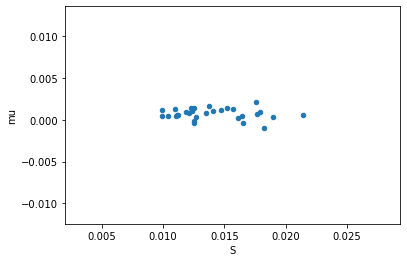

In [9]:
plot_df.plot.scatter(x='S', y='mu')

In [10]:
# Calculate correlation
r = ret.corr()
# r

In [11]:
# Portfolio analysis
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

In [12]:
# optimize wrt max sharpe ratio
raw_weights = ef.max_sharpe(risk_free_rate=0.02)
cleaned_weights = ef.clean_weights()

In [13]:
# View clean weights
cleaned_weights

{'AAPL': 1.0,
 'AXP': 0.0,
 'BA': 0.0,
 'CAT': 0.0,
 'CSCO': 0.0,
 'CVX': 0.0,
 'DIS': 0.0,
 'DOW': 0.0,
 'GS': 0.0,
 'HD': 0.0,
 'IBM': 0.0,
 'INTC': 0.0,
 'JNJ': 0.0,
 'JPM': 0.0,
 'KO': 0.0,
 'MCD': 0.0,
 'MMM': 0.0,
 'MRK': 0.0,
 'MSFT': 0.0,
 'NKE': 0.0,
 'PFE': 0.0,
 'PG': 0.0,
 'TRV': 0.0,
 'UNH': 0.0,
 'UTX': 0.0,
 'V': 0.0,
 'VZ': 0.0,
 'WBA': 0.0,
 'WMT': 0.0,
 'XOM': 0.0}

In [14]:
ef.portfolio_performance(verbose=True)

Expected annual return: 0.2%
Annual volatility: 1.8%
Sharpe Ratio: -1.02


(0.002130916549852705, 0.017603622276997917, -1.0150799175858396)

In [15]:
# how much of each stock to buy?
capital = 10000

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)

da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=capital)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

29 out of 30 tickers were removed
Discrete allocation: {'AAPL': 36}
Funds remaining: $94.60
